In [1]:
# Load necessary libraries

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Setup 'url' variable to store the URL 
url = "https://en.wikipedia.org/wiki/List_of_United_States_counties_and_county_equivalents"

# using the requests library get a response of the url
response = requests.get(url)

# Using BeautifulSoup library store the html contents in the soup object
soup = BeautifulSoup(response.content,'html.parser')

In [3]:
# Search for all <table> tags with class of wikitable in the BeautifulSoup object and load results in all_wikitables element 
all_wikitables = soup.find_all('table', {"class" : "wikitable"})

# Print total number of wikitables and confirm that there is only one wikitable that needs to be extracted.
print("Total number of wikitables are {}.".format(len(all_wikitables)))

Total number of wikitables are 1.


In [4]:
# Find table headers in all_wikitables and load them in header list. Remove any leading or trailing spaces from the header text.

header = []
for th in all_wikitables[0].findAll('th'):
    header.append(th.getText().strip())

# Print the list of headers
header

['County or equivalent',
 'State or equivalent',
 'Population (2019 estimate)',
 'Core\xa0Based Statistical\xa0Area']

In [5]:
# Find all table rows in all_wikitables and load them in rows list starting with second instance, since the first instance 
# is for headers.

rows = all_wikitables[0].findAll('tr')[1:]

In [6]:
# Extract the text contents for each element of table from rows into a list of lists data_rows, where there is a list for 
# each row. Remove any leading or trailing spaces from the element text.

data_rows = []

for tr in rows:
    row_elements = []
    for td in tr.findAll('td'):
        row_elements.append(td.get_text().strip())
    data_rows.append(row_elements)

In [7]:
# Use the rows from the data_rows list and the header list to create a data frame for wiki table

population_df = pd.DataFrame(data_rows, columns=header)

In [8]:
# Review first few records in the data frame using head() function
population_df.head()

,County or equivalent,State or equivalent,Population (2019 estimate),Core Based Statistical Area
0,Autauga,Alabama,"55,869","Montgomery, AL Metropolitan Statistical Area"
1,Baldwin,"223,234","Daphne-Fairhope-Foley, AL Metropolitan Statist...",None
2,Barbour,"24,686",,None
3,Bibb,"22,394","Birmingham-Hoover, AL Metropolitan Statistical...",None
4,Blount,"57,826","Birmingham-Hoover, AL Metropolitan Statistical...",None


In [9]:
# It looks like the 'State or equivalent' exists only once for all 'County or equivalent' values for the 'State or 
# equivalent'. Due to this reason, the values of 'Population (2019 estimate)' and 'Core Based Statistical Area' have 
# shifted by one column to the left when the 'State or equivalent' value does not exist. This issue can be corrected 
# by using one of the two options: 

# 1. Fix the data in the data frame by shifting some of the values to the right by one position
# 2. Extract the data from the HTML and shift the values before creating the data frame

# I opted for option 2, where I am looking at the number of table data elements. When there are four elements, the 'State 
# or equivalent' value exists, otherwise the 'State or equivalent' value does not exist. 

# I captured the 'State or equivalent' value when the length is four, and used it to populate the 'State or equivalent' value 
# for further rows until the next 'State or equivalent' value was returned (length of four elements). 

# I also shifted the other two elements to right by one position when number of elements were 3.  

data_rows = []

for tr in rows:
    row_elements = []
    for td in tr.findAll('td'):
        row_elements.append(td.get_text().strip())
    if(len(row_elements)== 4):
        state = row_elements[1]
    else:
        row_elements.append(row_elements[2])
        row_elements[2] = row_elements[1]
        row_elements[1] = state
    data_rows.append(row_elements)

In [10]:
# Use the rows from the data_rows list and the header list to create a data frame for wiki table

population_df = pd.DataFrame(data_rows, columns=header)

In [11]:
# Review first few records in the data frame using head() function
population_df.head()

,County or equivalent,State or equivalent,Population (2019 estimate),Core Based Statistical Area
0,Autauga,Alabama,"55,869","Montgomery, AL Metropolitan Statistical Area"
1,Baldwin,Alabama,"223,234","Daphne-Fairhope-Foley, AL Metropolitan Statist..."
2,Barbour,Alabama,"24,686",
3,Bibb,Alabama,"22,394","Birmingham-Hoover, AL Metropolitan Statistical..."
4,Blount,Alabama,"57,826","Birmingham-Hoover, AL Metropolitan Statistical..."


In [12]:
# Check the number of rows and columns of the data frame using shape method
population_df.shape

(3245, 4)

In [13]:
# To confirm that 'State or equivalent' values are correctly populated, group the data by 'State or equivalent' and count the 
# frequency for each state. Validate that there are no counts for invalid or null 'State or equivalent' values.

population_df.groupby(['State or equivalent']).count()

,County or equivalent,Population (2019 estimate),Core Based Statistical Area
State or equivalent,,,
Alabama,67,67,67
Alaska,30,30,30
American Samoa,5,5,5
Arizona,15,15,15
Arkansas,75,75,75
California,58,58,58
Colorado,64,64,64
Connecticut,8,8,8
Delaware,3,3,3


In [14]:
# Confirm that the 'State or equivalent' values are correctly populated by using min() and max() functions 
print(min(population_df['State or equivalent']))
print(max(population_df['State or equivalent']))

Alabama
Wyoming


In [15]:
# After Reviewing the data, it appears that 'Core\xa0Based Statistical\xa0Area' data column is not needed. 
# Delete the column.

del population_df['Core\xa0Based Statistical\xa0Area']

In [16]:
# Check how other columns are defined.

population_df.columns

Index(['County or equivalent', 'State or equivalent',
       'Population (2019 estimate)'],
      dtype='object')

In [17]:
# Rename the columns with appropriate short names

population_df.rename(columns={'County or equivalent': 'County', 
                            'State or equivalent': 'State',
                            'Population (2019 estimate)':'Population'}, inplace=True)

In [18]:
# Confirm that the column names are updated

population_df.columns

Index(['County', 'State', 'Population'], dtype='object')

In [19]:
# The missing values are identified as null and can be checked by using isnull() function. Find missing values for each column
# and add them by using sum() function to determine how many missing values exist for each column.

population_df.isnull().sum()

County        0
State         0
Population    0
dtype: int64

In [20]:
# Since there are no missing values, no action is needed to handle missing values.

In [21]:
# Check for duplicate values in 'County' and 'State' columns

print("State is duplicated - {}".format(any(population_df.State.duplicated())))
print("County is duplicated - {}".format(any(population_df.County.duplicated())))

State is duplicated - True
County is duplicated - True


In [22]:
# Since the 'State' value was duplicated for each corresponding county, it is obvious to have duplicate values for state.
# It is also possible to have same county name in multiple states. 
# Since the duplicates are allowed, no additional action is needed to handle duplicate values.

In [23]:
# use the boxplot() function to create a box plot for Population column. Check the type of Population column first.
type(population_df['Population'][0])

str

In [24]:
# Since the population column is of str type, the values need to be converted to int type before creating box plot.
# The commas in the values need to be removed using replace function before converting the values to int.
population_df['Population'] = population_df['Population'].str.replace(',','')

In [25]:
# Convert the values in Population column to int from str.
population_df['Population'] = population_df['Population'].astype(int)

{'whiskers': [<matplotlib.lines.Line2D at 0x178fecd6130>,
 'caps': [<matplotlib.lines.Line2D at 0x178fecd67f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x178fea32d90>],
 'medians': [<matplotlib.lines.Line2D at 0x178fecd6eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x178fece2250>],
 'means': []}

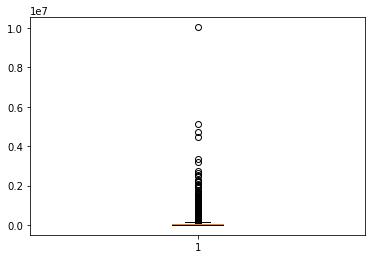

In [26]:
# use the boxplot() function to create a box plot for Population to check outliers
plt.boxplot(population_df['Population'])

In [27]:
# While there are significant outliers for the Population, having them for analysis is the purpose of the project.  
# By keeping all values, it can be tested whether Higher AQI value is positively correlated with Population or not. 

In [28]:
population_df.to_csv('population.csv', index=False)